In [1]:
# LOAD PACKAGES

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy import asarray
import rioxarray as rxr
import rasterio
import geopandas as gpd
import xarray as xr
import pandas as pd
import glob
import seaborn as sns
import os
import fnmatch
import math
from math import e
from osgeo import gdal 
print("packages loaded")

packages loaded


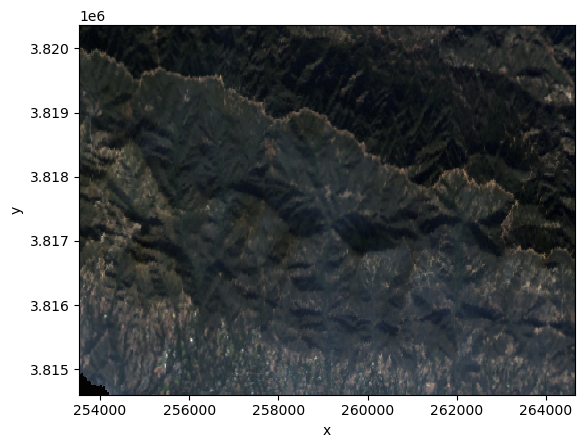

In [3]:
post_h = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/AVIRIS/pre_fire/171206/171206_av_20m_final_clip'
def normalize(array):
        """Normalizes numpy arrays into scale 0.0 - 1.0"""
        array_min, array_max = array.min(), array.max()
        return ((array - array_min)/(array_max - array_min))
image = rxr.open_rasterio(post_h)
#print(image)
red1 = image.data[28,:,:]
green1 = image.data[19,:,:]
blue1 = image.data[11,:,:]
red = normalize(red1)
green = normalize(green1)
blue = normalize(blue1)
dataPlot = np.zeros((red.shape[0],red.shape[1],3))
dataPlot[:,:,0] = red
dataPlot[:,:,1] = green
dataPlot[:,:,2] = blue

img = xr.Dataset()
img = xr.DataArray(dataPlot,
                        dims = ('y', 'x', 'band'),
                        coords ={'y': image.coords['y'], 
                                    'x': image.coords['x'],
                                    'band': ["red", "green", "blue"]})
img.plot.imshow()
#flat = (image.data).to_numpy().reshape(np.shape(image.data)[0],-1)

In [11]:
pre_h = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/AVIRIS/171206_av_20m_clip_final_warp.dat'

dirPolyLoc = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/shapefiles/17346.shp'

shape = gpd.read_file(dirPolyLoc)

image = rxr.open_rasterio(pre_h, masked=True)

#print(image)
b63 = image.data[62,:,:]
nirdata = np.zeros((b63.shape[0],b63.shape[1],1))
nirdata[:,:,0] = b63
nir = xr.Dataset()
nir = xr.DataArray(nirdata,
                        dims = ('y', 'x', 'band'),
                        coords ={'y': image.coords['y'], 
                                    'x': image.coords['x'],
                                    'band': ["63"]})

print(nir.crs)
#img.plot()


b218 = image.data[217,:,:]
swirdata = np.zeros((b218.shape[0],b218.shape[1],1))
swirdata[:,:,0] = b218
swir = xr.Dataset()
swir = xr.DataArray(nirdata,
                        dims = ('y', 'x', 'band'),
                        coords ={'y': image.coords['y'], 
                                    'x': image.coords['x'],
                                    'band': ["218"]})

swir.plot()


def nbr_clip(nir, swir, 
             shape, 
             plot=False, 
             save=False):
    basin_NIR = nir.rio.clip(shape.geometry.values,
                                shape.crs,
                                all_touched = False,
                                drop = True,
                                invert = False)
    
    basin_SWIR = swir.rio.clip(shape.geometry.values,
                                shape.crs,
                                all_touched = False,
                                drop = True,
                                invert = False)
    
    nbr = (basin_NIR - basin_SWIR) / (basin_NIR + basin_SWIR)
    
    return nbr

x = nbr_clip(nir, swir, shape)
print(x)
x.plot()


AttributeError: 'DataArray' object has no attribute 'crs'

In [6]:
post_h = '/mnt/nfs/lss/meerdink/home/skzebarth/masters/AVIRIS/171221_av_20m_final_warp.dat'
image2 = rxr.open_rasterio(post_h, masked=True)
b63a = image2[63,:,:]
b218a = image2[218,:,:]
print(image2.data.dtype)
y = nbr_clip(b63a, b218a, shape)
print(y)
y.plot()

float32


NameError: name 'nbr_clip' is not defined